# Databases of Statistics Finland

Using databases of Statistics Finland, automatically updated link to a database serch result can be saved. For the databases, see https://pxnet2.stat.fi/PXWeb/pxweb/en/StatFin/.

In the following example a database search from the database "Price index of old dwellings in housing companies (2015=100) and numbers of transactions, monthly" is performed. The database is accessed at https://pxnet2.stat.fi/PXWeb/pxweb/en/StatFin/StatFin__asu__ashi__kk/?tablelist=true. 

In the last stage of the database search (Show the table) an automatically updated link to the search results can be saved using the choice **Save your query**.

In [1]:
### Bring the libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Use the following style

plt.style.use('seaborn-whitegrid')

In [2]:
### Use the link you can copy after saving your query.

### In this query we omit the first thre rows  and use only columns [1, 2, 3, 4]

df = pd.read_excel('https://pxnet2.stat.fi:443/PXWeb/sq/8aabf31b-329d-481c-a16a-519873b1d197', skiprows = 3, usecols = [1, 2, 3, 4])

### df.head()

### Rename the badly named column.

df = df.rename(columns = {'Unnamed: 1' : 'Month'})

df.head()

,Month,Whole country,Greater Helsinki,Whole country excluding Greater Helsinki
0,2015M01,2031.0,3390.0,1620.0
1,2015M02,2042.0,3423.0,1626.0
2,2015M03,2067.0,3493.0,1641.0
3,2015M04,2059.0,3458.0,1639.0
4,2015M05,2071.0,3416.0,1661.0


In [3]:
### The most recent values marked by the asterisk are advanced information and may still change.

df['Month'].values

array(['2015M01', '2015M02', '2015M03', '2015M04', '2015M05', '2015M06',
       '2015M07', '2015M08', '2015M09', '2015M10', '2015M11', '2015M12',
       '2016M01', '2016M02', '2016M03', '2016M04', '2016M05', '2016M06',
       '2016M07', '2016M08', '2016M09', '2016M10', '2016M11', '2016M12',
       '2017M01', '2017M02', '2017M03', '2017M04', '2017M05', '2017M06',
       '2017M07', '2017M08', '2017M09', '2017M10', '2017M11', '2017M12',
       '2018M01', '2018M02', '2018M03', '2018M04', '2018M05', '2018M06',
       '2018M07', '2018M08', '2018M09', '2018M10', '2018M11', '2018M12',
       '2019M01', '2019M02', '2019M03', '2019M04', '2019M05', '2019M06',
       '2019M07', '2019M08', '2019M09', '2019M10', '2019M11', '2019M12',
       '2020M01', '2020M02', '2020M03', '2020M04', '2020M05', '2020M06',
       '2020M07', '2020M08', '2020M09', '2020M10', '2020M11', '2020M12',
       '2021M01*', '2021M02*', '2021M03*', '2021M04*', '2021M05*',
       '2021M06*', '2021M07*', '2021M08*', nan, nan, nan,

In [4]:
### Remove rows with missing values.

df = df.dropna(subset = ['Month'])

### Remove asterisks from month labels

df['Month'] = df['Month'].astype(str).str.strip('*')

### Add time labels to the index. Note the format where the capital letter M is between the year Y and the month m.

df.index = pd.to_datetime(df['Month'], format = '%YM%m')

### Remove the obsolete column Month

df = df.drop('Month', axis = 1)

### Shorten column names for easier use.

df.columns = ['Whole country', 'Greater Helsinki', 'Outside Greater Helsinki']

df.tail()

,Whole country,Greater Helsinki,Outside Greater Helsinki
Month,,,
2021-04-01,2234.0,4055.0,1706.0
2021-05-01,2262.0,4148.0,1720.0
2021-06-01,2264.0,4196.0,1713.0
2021-07-01,2267.0,4116.0,1731.0
2021-08-01,2294.0,4164.0,1753.0


Finally draw lines charts of prices in Greater Helsinki and Outside Greater Helsinki areas.

Text(0, 0.5, 'Outside Greater Helsinki area')

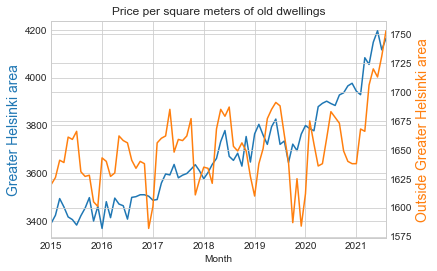

In [7]:
### First define object for Greater Helsinki

ax1 = df['Greater Helsinki'].plot(color = 'C0', title = 'Price per square meters of old dwellings')

plt.ylabel('Greater Helsinki area', color = 'C0', fontsize = 14)

### Then add another on top of this object

ax2 = ax1.twinx()

df['Outside Greater Helsinki'].plot(ax = ax2, color = 'C1')

plt.ylabel('Outside Greater Helsinki area', color = 'C1', fontsize = 14)

Source and origin of inspiration:<br /> 
Aki Taanila: Data-analytiikka Pythonilla: <a href="https://tilastoapu.wordpress.com/python/">https://tilastoapu.wordpress.com/python/</a>